In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.experiment_module.experiment import Experiment
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import cma
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

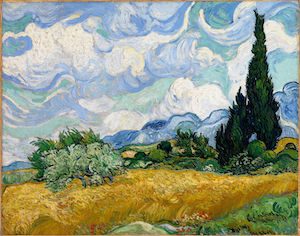

In [2]:
display(REFERENCE_IMAGE)

In [3]:
# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

In [4]:
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")


## UMDA

In [5]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                population_size=240,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=10,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)


In [6]:
experiment_umda = Experiment("UMDA", evo)

generation: 1 best fitness: 136334 avg. fitness: 145196.025
generation: 2 best fitness: 132601 avg. fitness: 140797.4875
generation: 3 best fitness: 131696 avg. fitness: 138028.69583333333
generation: 4 best fitness: 129742 avg. fitness: 135614.04166666666
generation: 5 best fitness: 126359 avg. fitness: 133415.40833333333
generation: 6 best fitness: 126359 avg. fitness: 131903.525
generation: 7 best fitness: 125155 avg. fitness: 130371.79583333334
generation: 8 best fitness: 122888 avg. fitness: 129364.9375
generation: 9 best fitness: 122888 avg. fitness: 128388.94166666667
generation: 10 best fitness: 122478 avg. fitness: 127583.425


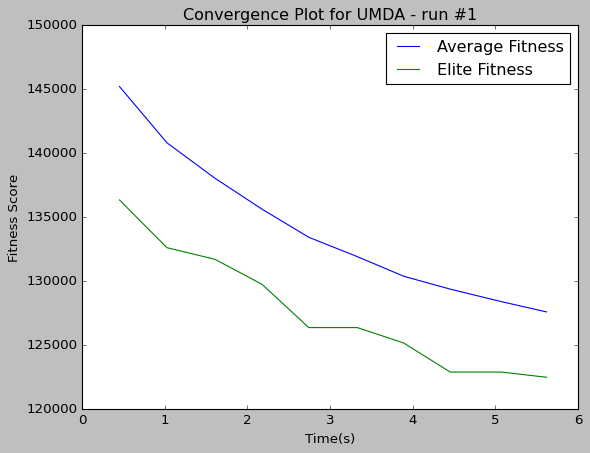

Average fitness 127583.425
Elite fitness 122478
Total Runtime 6.34 sec



In [7]:
experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="time")

generation: 1 best fitness: 131219 avg. fitness: 145289.07916666666
generation: 2 best fitness: 131219 avg. fitness: 141502.6
generation: 3 best fitness: 129253 avg. fitness: 138436.44583333333
generation: 4 best fitness: 129253 avg. fitness: 136009.5375
generation: 5 best fitness: 126191 avg. fitness: 134035.20833333334
generation: 6 best fitness: 126191 avg. fitness: 132600.39583333334
generation: 7 best fitness: 125005 avg. fitness: 131176.16666666666
generation: 8 best fitness: 125005 avg. fitness: 129881.94583333333
generation: 9 best fitness: 122973 avg. fitness: 128823.32916666666
generation: 10 best fitness: 116113 avg. fitness: 127722.21666666666


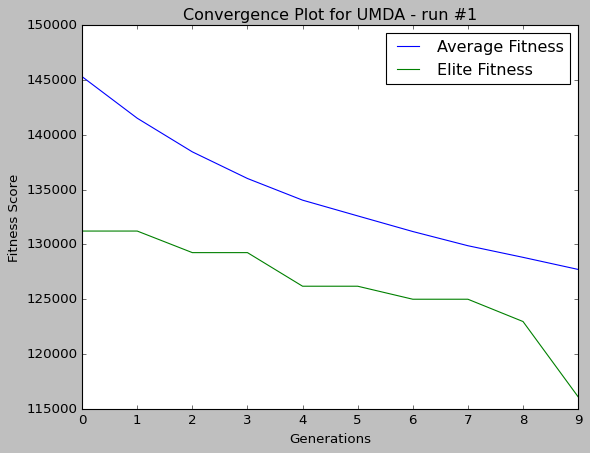

Average fitness 127722.21666666666
Elite fitness 116113
Total Runtime 6.1 sec



In [8]:
experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="generation")

generation: 1 best fitness: 133599 avg. fitness: 143595.15
generation: 2 best fitness: 133599 avg. fitness: 140211.09
generation: 3 best fitness: 130346 avg. fitness: 137916.24
generation: 4 best fitness: 129663 avg. fitness: 136366.02
generation: 5 best fitness: 127891 avg. fitness: 134506.63
generation: 6 best fitness: 126597 avg. fitness: 132281.25
generation: 7 best fitness: 122823 avg. fitness: 129999.54
generation: 8 best fitness: 122823 avg. fitness: 128316.89
generation: 9 best fitness: 117955 avg. fitness: 126625.67
generation: 10 best fitness: 117955 avg. fitness: 124923.41


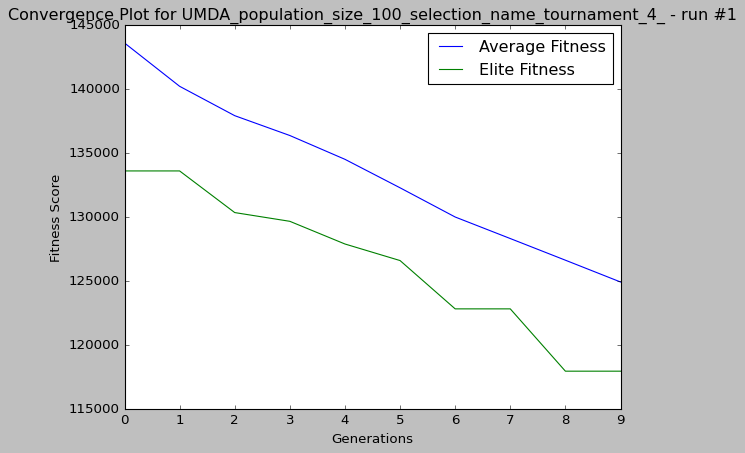

Average fitness 124923.41
Elite fitness 117955
Total Runtime 4.49 sec

generation: 1 best fitness: 137861 avg. fitness: 143821.82
generation: 2 best fitness: 136634 avg. fitness: 139620.93
generation: 3 best fitness: 133138 avg. fitness: 137628.3
generation: 4 best fitness: 130670 avg. fitness: 135739.81
generation: 5 best fitness: 127862 avg. fitness: 132788.61
generation: 6 best fitness: 127058 avg. fitness: 129818.37
generation: 7 best fitness: 119469 avg. fitness: 126972.11
generation: 8 best fitness: 119469 avg. fitness: 124078.26
generation: 9 best fitness: 119469 avg. fitness: 121117.06
generation: 10 best fitness: 116579 avg. fitness: 119249.23


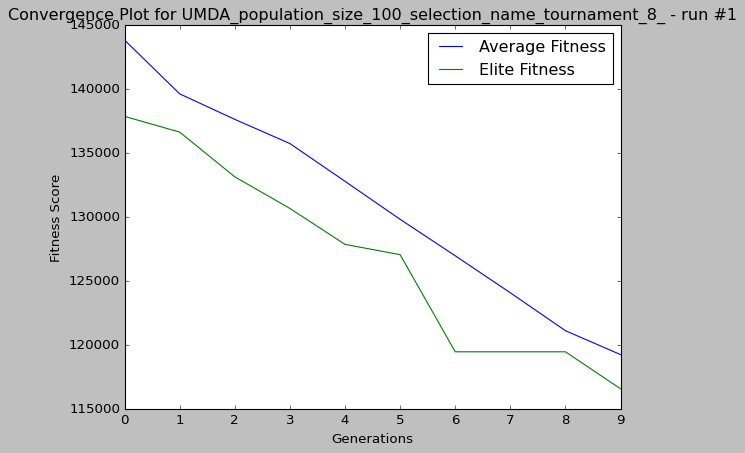

Average fitness 119249.23
Elite fitness 116579
Total Runtime 4.4 sec

generation: 1 best fitness: 132089 avg. fitness: 145290.685
generation: 2 best fitness: 129514 avg. fitness: 141581.67
generation: 3 best fitness: 129514 avg. fitness: 138405.41
generation: 4 best fitness: 129514 avg. fitness: 136068.655
generation: 5 best fitness: 129471 avg. fitness: 134411.72
generation: 6 best fitness: 127419 avg. fitness: 132583.85
generation: 7 best fitness: 124989 avg. fitness: 131132.5
generation: 8 best fitness: 120897 avg. fitness: 129725.64
generation: 9 best fitness: 117587 avg. fitness: 128204.77
generation: 10 best fitness: 117587 avg. fitness: 126569.26


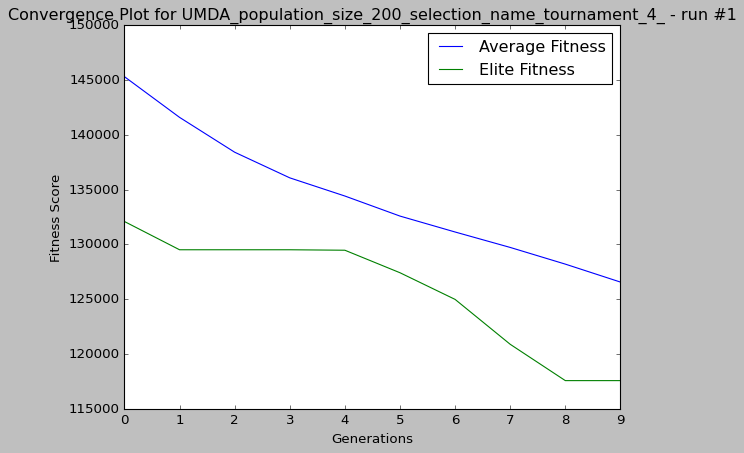

Average fitness 126569.26
Elite fitness 117587
Total Runtime 5.61 sec

generation: 1 best fitness: 129638 avg. fitness: 140446.845
generation: 2 best fitness: 129153 avg. fitness: 135210.045
generation: 3 best fitness: 128508 avg. fitness: 131133.295
generation: 4 best fitness: 128508 avg. fitness: 129604.245
generation: 5 best fitness: 124021 avg. fitness: 128787.805
generation: 6 best fitness: 124021 avg. fitness: 127675.05
generation: 7 best fitness: 124021 avg. fitness: 125970.7
generation: 8 best fitness: 117885 avg. fitness: 124163.935
generation: 9 best fitness: 116373 avg. fitness: 122511.105
generation: 10 best fitness: 116373 avg. fitness: 119685.59


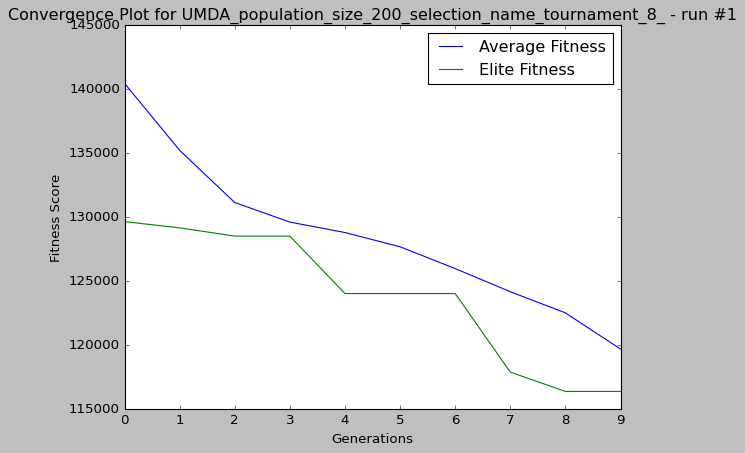

Average fitness 119685.59
Elite fitness 116373
Total Runtime 5.65 sec

generation: 1 best fitness: 130698 avg. fitness: 144293.47333333333
generation: 2 best fitness: 130698 avg. fitness: 140224.89666666667
generation: 3 best fitness: 130698 avg. fitness: 137656.24333333335
generation: 4 best fitness: 124484 avg. fitness: 135574.60666666666
generation: 5 best fitness: 123775 avg. fitness: 133697.77333333335
generation: 6 best fitness: 123651 avg. fitness: 131948.09666666668
generation: 7 best fitness: 123651 avg. fitness: 130220.80333333333
generation: 8 best fitness: 121005 avg. fitness: 128369.38666666667
generation: 9 best fitness: 121005 avg. fitness: 126968.62333333334
generation: 10 best fitness: 118960 avg. fitness: 125470.31333333334


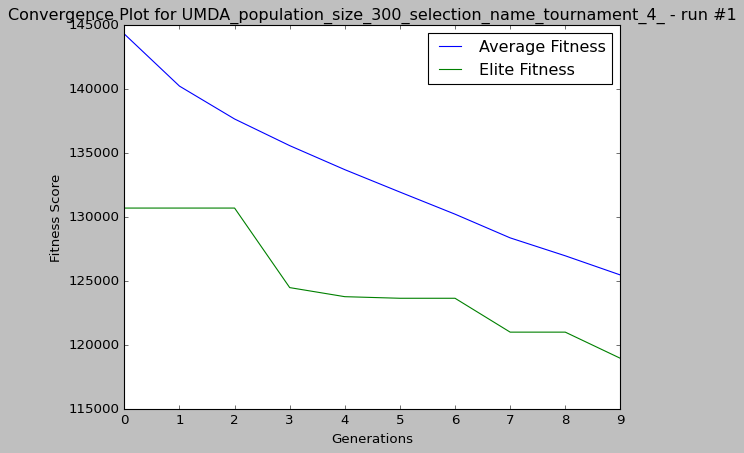

Average fitness 125470.31333333334
Elite fitness 118960
Total Runtime 6.9 sec

generation: 1 best fitness: 132694 avg. fitness: 141896.08666666667
generation: 2 best fitness: 129810 avg. fitness: 136586.53666666665
generation: 3 best fitness: 127962 avg. fitness: 133251.11666666667
generation: 4 best fitness: 122559 avg. fitness: 130873.19333333333
generation: 5 best fitness: 122559 avg. fitness: 128920.25333333333
generation: 6 best fitness: 117575 avg. fitness: 126560.95333333334
generation: 7 best fitness: 115354 avg. fitness: 123715.35666666667
generation: 8 best fitness: 115354 avg. fitness: 121309.30666666667
generation: 9 best fitness: 115354 avg. fitness: 118546.90333333334
generation: 10 best fitness: 115164 avg. fitness: 116309.32333333333


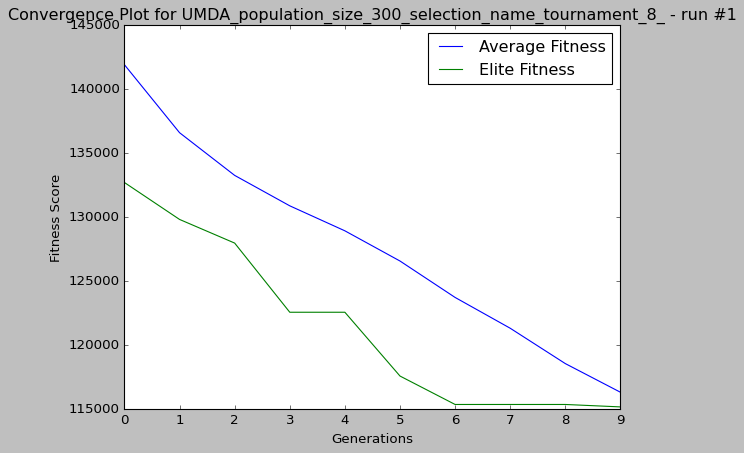

Average fitness 116309.32333333333
Elite fitness 115164
Total Runtime 6.81 sec

Best hyperparameters found: UMDA_population_size_300_selection_name_tournament_8_ with score 115164


In [9]:
params = {
    'population_size': [100, 200, 300],
    'selection_name': ['tournament_4', 'tournament_8']
}

experiment_umda.run_hyperparameter_eval(params, plot_converge=True, mode="generation")


## PBIL

In [16]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PBIL",
                population_size=200,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=50,
                num_features_mutation_strength=.25,
                selection_name='tournament_20',
                verbose=verbose_output,
                PBIL_learning_rate=0.95)


In [17]:
experiment_pbil = Experiment("PBIL", evo)

generation: 1 best fitness: 131233 avg. fitness: 151395.865
generation: 2 best fitness: 129442 avg. fitness: 148254.135
generation: 3 best fitness: 123190 avg. fitness: 144368.48
generation: 4 best fitness: 123190 avg. fitness: 141208.895
generation: 5 best fitness: 120633 avg. fitness: 138399.685
generation: 6 best fitness: 114501 avg. fitness: 135575.36
generation: 7 best fitness: 114501 avg. fitness: 132894.695
generation: 8 best fitness: 114501 avg. fitness: 130549.275
generation: 9 best fitness: 113143 avg. fitness: 128929.51
generation: 10 best fitness: 113143 avg. fitness: 127678.315
generation: 11 best fitness: 109279 avg. fitness: 125359.03
generation: 12 best fitness: 109279 avg. fitness: 125038.465
generation: 13 best fitness: 109279 avg. fitness: 123315.275
generation: 14 best fitness: 105204 avg. fitness: 121759.945
generation: 15 best fitness: 105204 avg. fitness: 121984.8
generation: 16 best fitness: 105204 avg. fitness: 120448.845
generation: 17 best fitness: 104545 avg

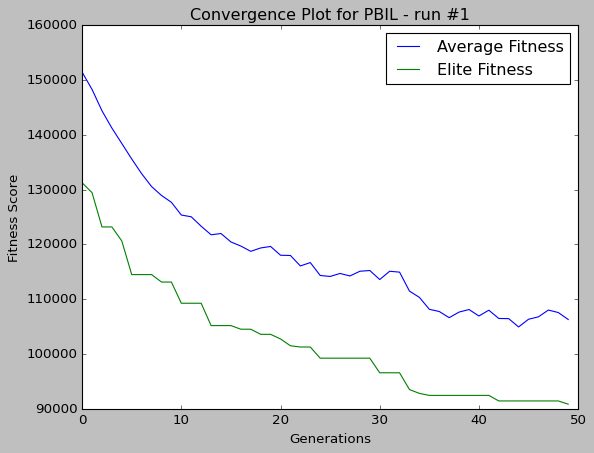

Average fitness 106317.63
Elite fitness 90883
Total Runtime 32.35 sec



In [18]:
experiment_pbil.run_experiment(repeats=1, plot_converge=True, mode="generation")

### New selection method FISCIS + UMDA

In [ ]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="classic",
                population_size=500,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=0,
                initialization="RANDOM",
                generation_budget=10,
                num_features_mutation_strength=.25,
                selection_name='fiscis_umda',
                verbose=verbose_output)

exp = Experiment('fiscis_umda', evo)
exp.run_experiment(repeats=1, plot_converge=True, mode="generation")

## cGA

## Compare Methods